In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [18]:
# Seabornにサンプルデータがあります。
# お店へのチップに関するデータをロード
tips = sns.load_dataset("tips")

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


 - total_bill: その日の飲食代の総額
 - tip: チップ額
 - sex: 払った人の性別
 - smoker: 喫煙者かどうか
 - day: 曜日
 - time: 時間
 - size: 来店した人

# プロットと回帰

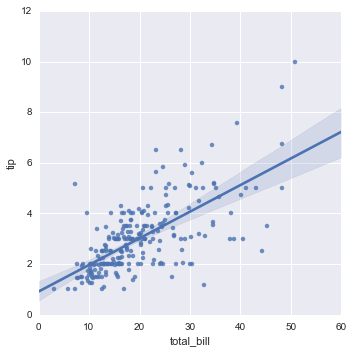

In [20]:
# lmplot() ｘ=total bill y=tipsでプロットします。
# lmplot(x軸, y軸, DataFrameオブジェクト)
sns.lmplot("total_bill","tip",tips)

分析結果：だいたい飲食費の1割がチップ料金になるので、飲食費が多いとチップも高くなる

### 回帰直線とプロットごとにスタイルを適用

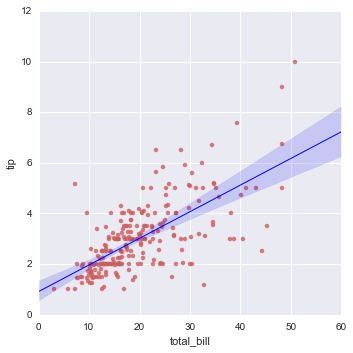

In [22]:
# グラフごとにパラメータを変えられます。
# 散布図： scatter_kws
# 回帰直線：　line_kws
sns.lmplot("total_bill", "tip", tips,
                   scatter_kws={'marker':'o', 'color':'indianred'},
                   line_kws={'linewidth':1, 'color':'blue'})

### 高次の関数で近似

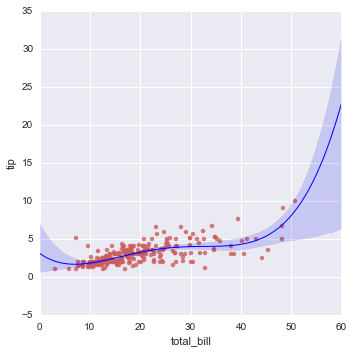

In [23]:
# 4次関数で回帰曲線をひくこともできます。
# order=次元数
sns.lmplot("total_bill", "tip", tips, order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

### 散布図だけプロット

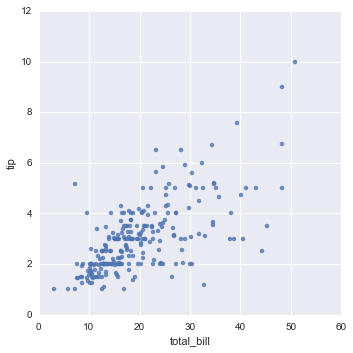

In [24]:
# 単なるプロットもできます。
# fit_reg=False
sns.lmplot("total_bill", "tip", tips,fit_reg=False)

---
# 離散的な値のプロット

In [26]:
# 離散的な値でもlmplot()は使えます。

# チップの割合を計算します。
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


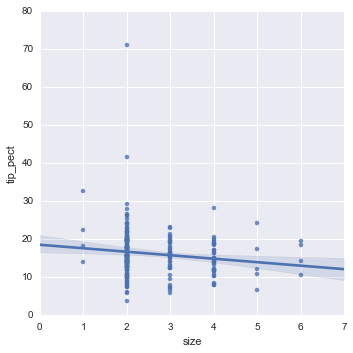

In [27]:
sns.lmplot("size", "tip_pect", tips)

### 離散的な値を見やすくする

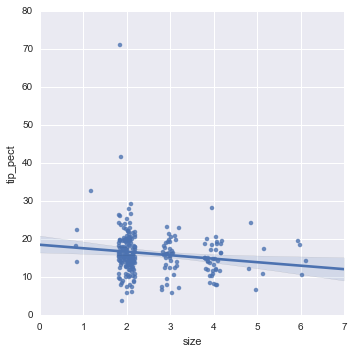

In [28]:
#左右に少しずれして表示
#x_jitter=値
sns.lmplot("size", "tip_pect", tips, x_jitter=0.2)

### それぞれの離散値に関数を適用

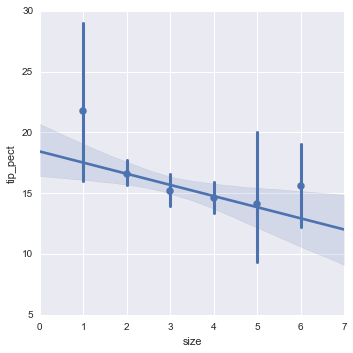

In [29]:
# 来店者ごとのチップの平均値を計算
# 特定の推定量を描画することもできます。
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);

2, 3, 4人のグループはチップを支払う割合が安定している（分散が小さい）と言える

---
# データの種類ごとの傾向を分析

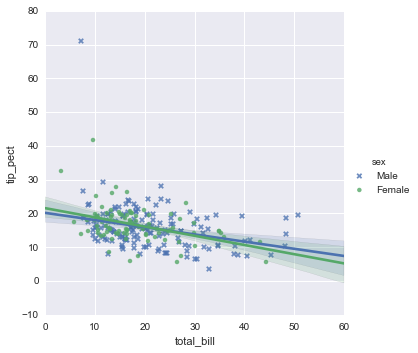

In [31]:
# hueが便利です。
# hue：傾向という意味がある
# データを層別化して分析する
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

性別(sex)ごとの傾向を分析

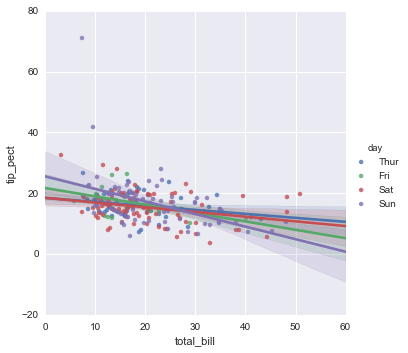

In [32]:
# 曜日ごとの傾向
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

---
# 局所的に回帰する(loess)

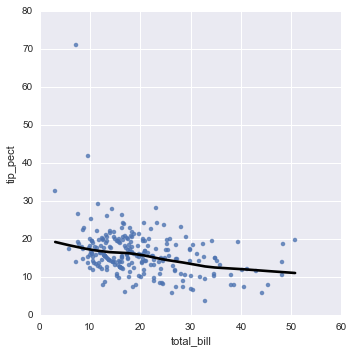

In [15]:
# LOESSの説明（英語）です。
url = 'http://en.wikipedia.org/wiki/Local_regression'
sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

---
# 回帰直線の分析だけだったら関数regplotだけでもOK

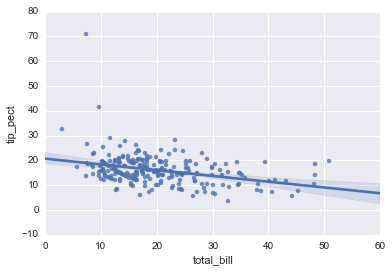

In [16]:
# lmplot() は実は、もっと低レベルな関数regplotを使っています。
sns.regplot("total_bill","tip_pect",tips)

---
# ２つの描画を表示

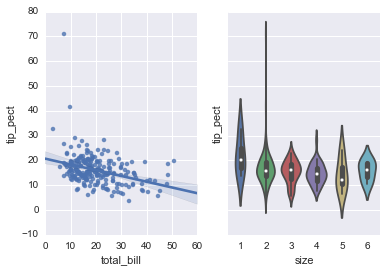

In [34]:
# 描画のエリアを分割することもできます。

#１行２列でy軸を共有
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

#それぞれのプロット関数のax引数にaxis1, axis2を指定
sns.regplot("total_bill","tip_pect",tips, ax=axis1)
sns.violinplot(y='tip_pect', x='size', data=tips.sort('size') , ax=axis2)